In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d = 2
beta = np.array([0, -2.2])

In [9]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [10]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [11]:
num_sim = 1000

## load simulation

In [12]:
data = pd.read_feather('data/simulation_randinf_0.feather')

In [13]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,3.250000,324.997762,356.0,0.956069,0,0
1,0,1,3.250000,340.245831,298.0,0.962543,0,0
2,0,2,3.250000,392.196621,409.0,0.968283,0,0
3,0,3,3.250000,471.047829,545.0,0.973654,1,0
4,0,4,3.250000,581.900998,584.0,0.979752,4,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,209.251090,218.0,9.330738,18,1
59996,999,56,0.648378,199.304639,232.0,8.838784,8,1
59997,999,57,0.648378,190.393661,212.0,8.368827,7,1
59998,999,58,0.648378,182.315811,204.0,7.916002,3,1


# 3. Fit

In [14]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, "nbinom")

In [17]:
nsim = np.zeros(num_sim)
msim = np.zeros(num_sim)
bsim = np.zeros((num_sim,d))

In [18]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    # fit
    nmle, mmle, bmle, ll =\
    model.fit(A, Y, n_iter=500, step_size=1,
              history=False, verbose=False)
    
    nsim[iter_sim] = nmle
    msim[iter_sim] = mmle
    bsim[iter_sim,:] = bmle
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:139: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


1-th simulation finished, 3.207591 sec.
2-th simulation finished, 2.886826 sec.
3-th simulation finished, 3.229105 sec.
4-th simulation finished, 2.536213 sec.
5-th simulation finished, 3.278325 sec.
6-th simulation finished, 3.420997 sec.
7-th simulation finished, 3.190036 sec.
8-th simulation finished, 2.993734 sec.
9-th simulation finished, 3.060336 sec.
10-th simulation finished, 3.561825 sec.
11-th simulation finished, 3.412987 sec.
12-th simulation finished, 2.698131 sec.
13-th simulation finished, 3.487646 sec.
14-th simulation finished, 3.295021 sec.
15-th simulation finished, 3.242963 sec.
16-th simulation finished, 3.288736 sec.
17-th simulation finished, 2.674552 sec.
18-th simulation finished, 3.051369 sec.
19-th simulation finished, 3.074528 sec.
20-th simulation finished, 3.089756 sec.
21-th simulation finished, 3.285767 sec.
22-th simulation finished, 3.307662 sec.
23-th simulation finished, 2.689852 sec.
24-th simulation finished, 3.235677 sec.
25-th simulation finished

199-th simulation finished, 3.611660 sec.
200-th simulation finished, 3.387181 sec.
201-th simulation finished, 2.950369 sec.
202-th simulation finished, 2.977588 sec.
203-th simulation finished, 2.800814 sec.
204-th simulation finished, 3.128738 sec.
205-th simulation finished, 3.764420 sec.
206-th simulation finished, 3.389427 sec.
207-th simulation finished, 2.922995 sec.
208-th simulation finished, 3.017658 sec.
209-th simulation finished, 3.606963 sec.
210-th simulation finished, 3.347304 sec.
211-th simulation finished, 3.654157 sec.
212-th simulation finished, 3.267871 sec.
213-th simulation finished, 3.712173 sec.
214-th simulation finished, 3.024565 sec.
215-th simulation finished, 3.623927 sec.
216-th simulation finished, 3.108996 sec.
217-th simulation finished, 3.077946 sec.
218-th simulation finished, 2.959638 sec.
219-th simulation finished, 3.569108 sec.
220-th simulation finished, 2.958114 sec.
221-th simulation finished, 3.675394 sec.
222-th simulation finished, 3.1802

395-th simulation finished, 2.848146 sec.
396-th simulation finished, 2.875887 sec.
397-th simulation finished, 3.436606 sec.
398-th simulation finished, 2.894337 sec.
399-th simulation finished, 2.885524 sec.
400-th simulation finished, 3.174053 sec.
401-th simulation finished, 2.715612 sec.
402-th simulation finished, 2.817306 sec.
403-th simulation finished, 3.751151 sec.
404-th simulation finished, 2.877082 sec.
405-th simulation finished, 3.453816 sec.
406-th simulation finished, 3.482948 sec.
407-th simulation finished, 3.278701 sec.
408-th simulation finished, 3.067937 sec.
409-th simulation finished, 2.919342 sec.
410-th simulation finished, 2.827535 sec.
411-th simulation finished, 3.244229 sec.
412-th simulation finished, 2.928441 sec.
413-th simulation finished, 3.429803 sec.
414-th simulation finished, 3.504979 sec.
415-th simulation finished, 2.886474 sec.
416-th simulation finished, 3.280426 sec.
417-th simulation finished, 3.119630 sec.
418-th simulation finished, 3.5010

591-th simulation finished, 3.444244 sec.
592-th simulation finished, 2.954242 sec.
593-th simulation finished, 3.676497 sec.
594-th simulation finished, 2.906461 sec.
595-th simulation finished, 2.877835 sec.
596-th simulation finished, 3.404806 sec.
597-th simulation finished, 3.448670 sec.
598-th simulation finished, 3.619403 sec.
599-th simulation finished, 2.886819 sec.
600-th simulation finished, 3.334427 sec.
601-th simulation finished, 2.861333 sec.
602-th simulation finished, 3.411360 sec.
603-th simulation finished, 3.286740 sec.
604-th simulation finished, 3.082814 sec.
605-th simulation finished, 4.119035 sec.
606-th simulation finished, 3.300380 sec.
607-th simulation finished, 3.534528 sec.
608-th simulation finished, 3.196434 sec.
609-th simulation finished, 3.442315 sec.
610-th simulation finished, 3.163917 sec.
611-th simulation finished, 2.729961 sec.
612-th simulation finished, 3.219135 sec.
613-th simulation finished, 3.000541 sec.
614-th simulation finished, 2.7428

787-th simulation finished, 3.366220 sec.
788-th simulation finished, 3.293890 sec.
789-th simulation finished, 3.576150 sec.
790-th simulation finished, 2.810743 sec.
791-th simulation finished, 3.286238 sec.
792-th simulation finished, 3.424606 sec.
793-th simulation finished, 3.206124 sec.
794-th simulation finished, 3.453819 sec.
795-th simulation finished, 3.280991 sec.
796-th simulation finished, 2.845769 sec.
797-th simulation finished, 3.318700 sec.
798-th simulation finished, 3.473662 sec.
799-th simulation finished, 3.509158 sec.
800-th simulation finished, 2.836489 sec.
801-th simulation finished, 3.346122 sec.
802-th simulation finished, 3.404031 sec.
803-th simulation finished, 3.524740 sec.
804-th simulation finished, 3.299612 sec.
805-th simulation finished, 3.260937 sec.
806-th simulation finished, 3.027536 sec.
807-th simulation finished, 3.491748 sec.
808-th simulation finished, 3.239363 sec.
809-th simulation finished, 3.649014 sec.
810-th simulation finished, 3.8533

983-th simulation finished, 3.335141 sec.
984-th simulation finished, 2.894568 sec.
985-th simulation finished, 3.489846 sec.
986-th simulation finished, 3.320444 sec.
987-th simulation finished, 3.436072 sec.
988-th simulation finished, 3.536063 sec.
989-th simulation finished, 3.330470 sec.
990-th simulation finished, 3.320222 sec.
991-th simulation finished, 3.319110 sec.
992-th simulation finished, 3.343635 sec.
993-th simulation finished, 2.997745 sec.
994-th simulation finished, 3.338163 sec.
995-th simulation finished, 3.198262 sec.
996-th simulation finished, 3.874710 sec.
997-th simulation finished, 3.196933 sec.
998-th simulation finished, 3.247574 sec.
999-th simulation finished, 3.525508 sec.
1000-th simulation finished, 2.782616 sec.


In [19]:
# np.savez('coverage_freqepid_nbinom_randinf_0.npz',
#          nsim = nsim, msim = msim, bsim = bsim)

# 4. Wald's Confidence Region Coverage Test

In [ ]:
# locals.update(np.load('coverage_freqepid_nbinom_randinf_0.npz'))

In [20]:
Ihs_dth = np.zeros([num_sim, 2+d, 2+d])
Ts_dth = np.zeros(num_sim)
ps_dth = np.zeros(num_sim)

In [21]:
Ihs_hac = np.zeros([num_sim, 2+d, 2+d])
Ts_hac = np.zeros(num_sim)
ps_hac = np.zeros(num_sim)

In [22]:
Ihs_sdw = np.zeros([num_sim, 2+d, 2+d])
Ts_sdw = np.zeros(num_sim)
ps_sdw = np.zeros(num_sim)

In [23]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    nmle = nsim[iter_sim]
    mmle = msim[iter_sim]
    bmle = bsim[iter_sim,:]
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    Ihat_dth, Ihat_hac, Ihat_sdw =\
    model.inference(A, Y, nmle, mmle, bmle)
    
    # Fisher information matrix
    Ihs_dth[iter_sim] = Ihat_dth
    Ts_dth[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_dth[iter_sim])[-1,-1])
    ps_dth[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_dth[iter_sim])))
    
    # HAC estimator
    Ihs_hac[iter_sim] = Ihat_hac
    Ts_hac[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_hac[iter_sim])[-1,-1])
    ps_hac[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_hac[iter_sim])))
    
    # Sandwich estimator
    Ihs_sdw[iter_sim] = Ihat_sdw
    Ts_sdw[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_sdw[iter_sim])[-1,-1])
    ps_sdw[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_sdw[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.009404 sec.
2-th simulation finished, 0.003598 sec.
3-th simulation finished, 0.003348 sec.
4-th simulation finished, 0.003501 sec.
5-th simulation finished, 0.002458 sec.
6-th simulation finished, 0.002553 sec.
7-th simulation finished, 0.002378 sec.
8-th simulation finished, 0.002477 sec.
9-th simulation finished, 0.002188 sec.
10-th simulation finished, 0.002136 sec.
11-th simulation finished, 0.001921 sec.
12-th simulation finished, 0.001838 sec.
13-th simulation finished, 0.001804 sec.
14-th simulation finished, 0.001812 sec.
15-th simulation finished, 0.001710 sec.
16-th simulation finished, 0.001749 sec.
17-th simulation finished, 0.001697 sec.
18-th simulation finished, 0.001728 sec.
19-th simulation finished, 0.001646 sec.
20-th simulation finished, 0.001553 sec.
21-th simulation finished, 0.001467 sec.
22-th simulation finished, 0.001737 sec.
23-th simulation finished, 0.001459 sec.
24-th simulation finished, 0.001376 sec.
25-th simulation finished

361-th simulation finished, 0.001271 sec.
362-th simulation finished, 0.001433 sec.
363-th simulation finished, 0.001084 sec.
364-th simulation finished, 0.001046 sec.
365-th simulation finished, 0.001044 sec.
366-th simulation finished, 0.001068 sec.
367-th simulation finished, 0.001036 sec.
368-th simulation finished, 0.001039 sec.
369-th simulation finished, 0.001020 sec.
370-th simulation finished, 0.001021 sec.
371-th simulation finished, 0.001013 sec.
372-th simulation finished, 0.001027 sec.
373-th simulation finished, 0.001108 sec.
374-th simulation finished, 0.001123 sec.
375-th simulation finished, 0.001010 sec.
376-th simulation finished, 0.001034 sec.
377-th simulation finished, 0.001003 sec.
378-th simulation finished, 0.001037 sec.
379-th simulation finished, 0.001017 sec.
380-th simulation finished, 0.001031 sec.
381-th simulation finished, 0.001004 sec.
382-th simulation finished, 0.001046 sec.
383-th simulation finished, 0.001011 sec.
384-th simulation finished, 0.0010

749-th simulation finished, 0.001474 sec.
750-th simulation finished, 0.001207 sec.
751-th simulation finished, 0.001081 sec.
752-th simulation finished, 0.001056 sec.
753-th simulation finished, 0.001033 sec.
754-th simulation finished, 0.001030 sec.
755-th simulation finished, 0.001038 sec.
756-th simulation finished, 0.001017 sec.
757-th simulation finished, 0.001021 sec.
758-th simulation finished, 0.001016 sec.
759-th simulation finished, 0.001006 sec.
760-th simulation finished, 0.001036 sec.
761-th simulation finished, 0.001085 sec.
762-th simulation finished, 0.001095 sec.
763-th simulation finished, 0.001012 sec.
764-th simulation finished, 0.001065 sec.
765-th simulation finished, 0.001025 sec.
766-th simulation finished, 0.001043 sec.
767-th simulation finished, 0.001042 sec.
768-th simulation finished, 0.001054 sec.
769-th simulation finished, 0.001013 sec.
770-th simulation finished, 0.001044 sec.
771-th simulation finished, 0.001019 sec.
772-th simulation finished, 0.0010

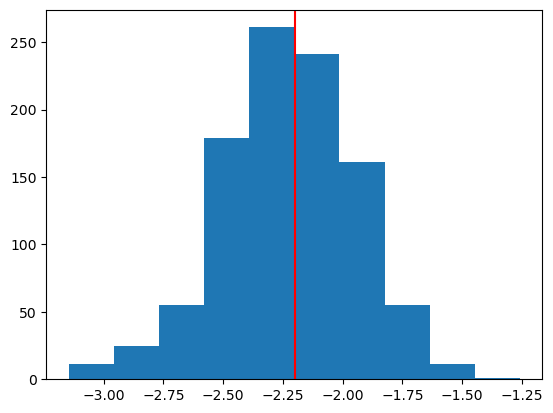

In [24]:
plt.hist(bsim[:,1])
plt.axvline(beta[1], color='red')

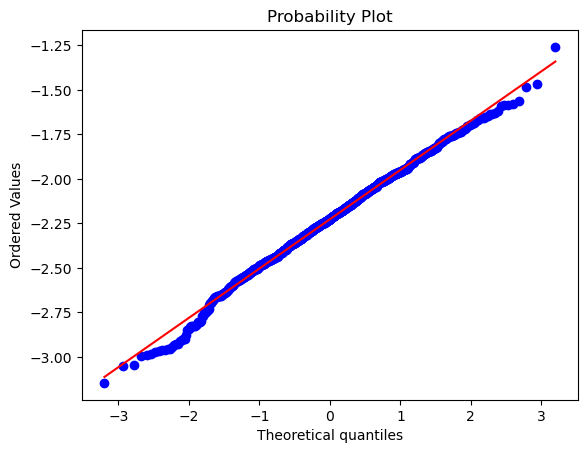

In [25]:
stats.probplot(bsim[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

(array([ 41., 137., 277., 256., 179.,  74.,  29.,   6.,   0.,   1.]),
 array([-2.48981358, -1.72776564, -0.96571769, -0.20366975,  0.55837819,
         1.32042613,  2.08247407,  2.84452201,  3.60656995,  4.36861789,
         5.13066583]),
 <BarContainer object of 10 artists>)

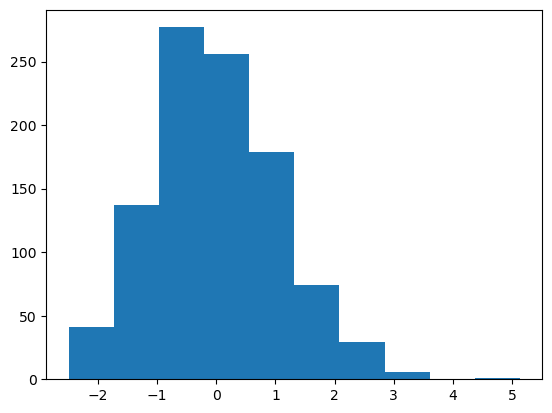

In [26]:
plt.hist(Ts_dth)

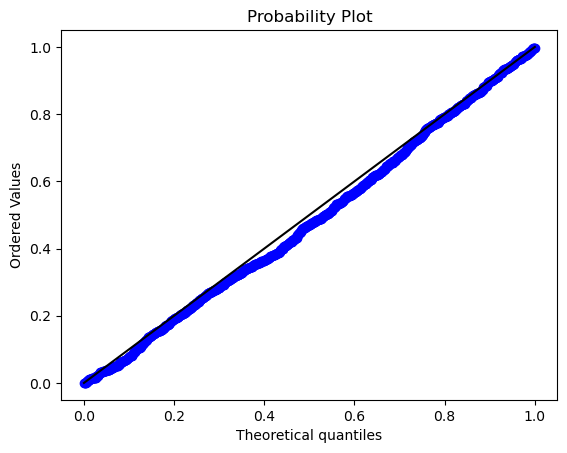

In [27]:
stats.probplot(ps_dth, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [28]:
np.mean(np.abs(ps_dth) > 0.05)

0.932

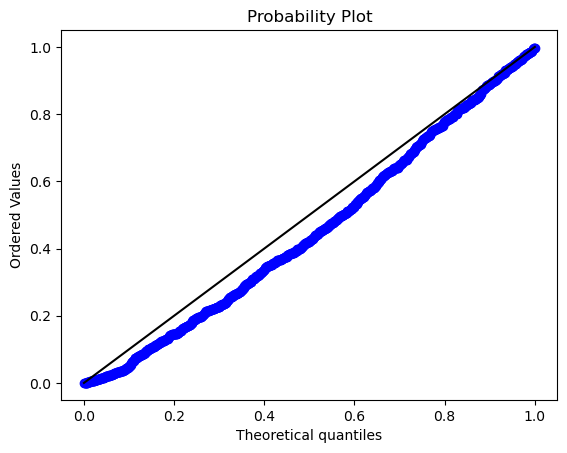

In [29]:
stats.probplot(ps_sdw, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [30]:
np.mean(np.abs(ps_sdw) > 0.05)

0.899